### Seaborn :고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# seaborn에서 제공하는 titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [3]:
# Style(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

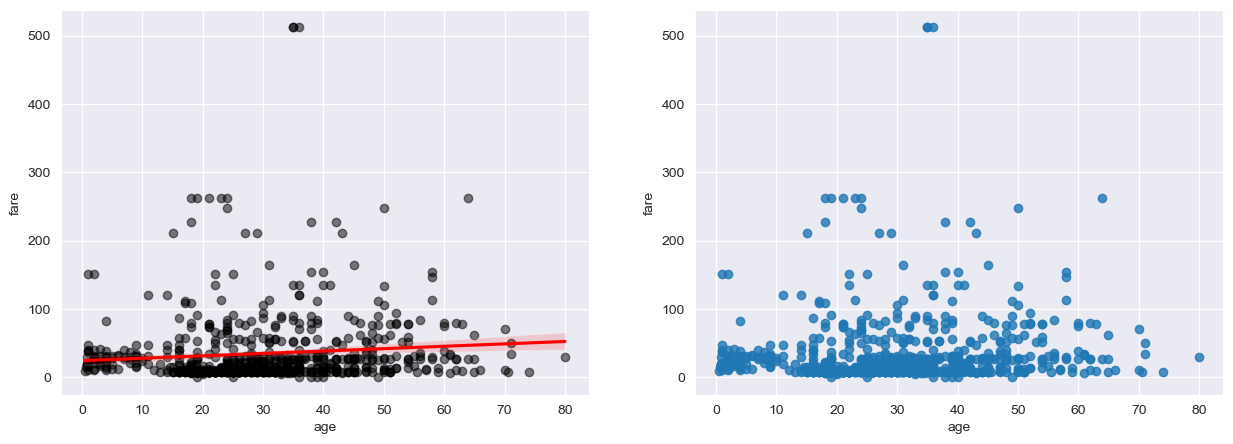

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선 미표시
sns.regplot(
    x = 'age', 
    y = 'fare',
    data=titanic,
    fit_reg=False,
    ax=ax2
)

# 선형 회귀선 표시
sns.regplot(
    x = 'age', 
    y = 'fare',
    data=titanic,
    fit_reg=True,
    ax=ax1,
    scatter_kws={
            'color' : 'black', # 점 컬러
            'alpha' : 0.5 # 점 투명도
            },
    line_kws={
            'color' : 'red' # 회귀선 컬러
            }
)

plt.show()

In [12]:
import numpy as np

np.corrcoef(titanic.pclass, titanic.survived)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

### 히트맵(heatmap)
: 2개의 데이터를 x,y에 놓고 데이터를 매트릭스 형태로 분류 

In [13]:
# 객실(pclass)의 입실 숫자를 성별로 

table = titanic.pivot_table(
    index=['sex'],
    columns=['pclass'],
    aggfunc='size' # 빈도수
)
table

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


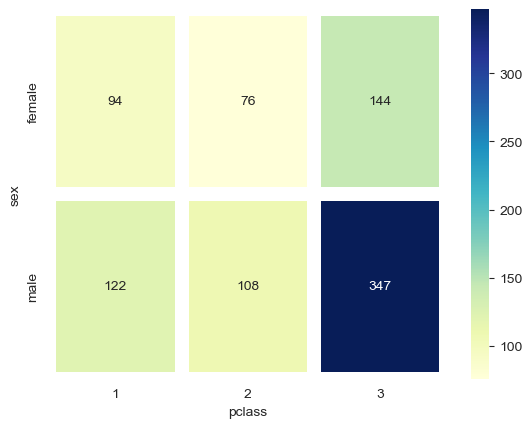

In [ ]:
# 히트맵 그리기

sns.heatmap(
    table,
    annot=True,
    fmt='d', # 정수형 포맷
    cmap='YlGnBu', # 컬러맵
    linewidths=10 # 구분선 간격 
)

plt.show()

---
### 데이터 산점도(산포도)

In [21]:
sns.set_style('whitegrid')

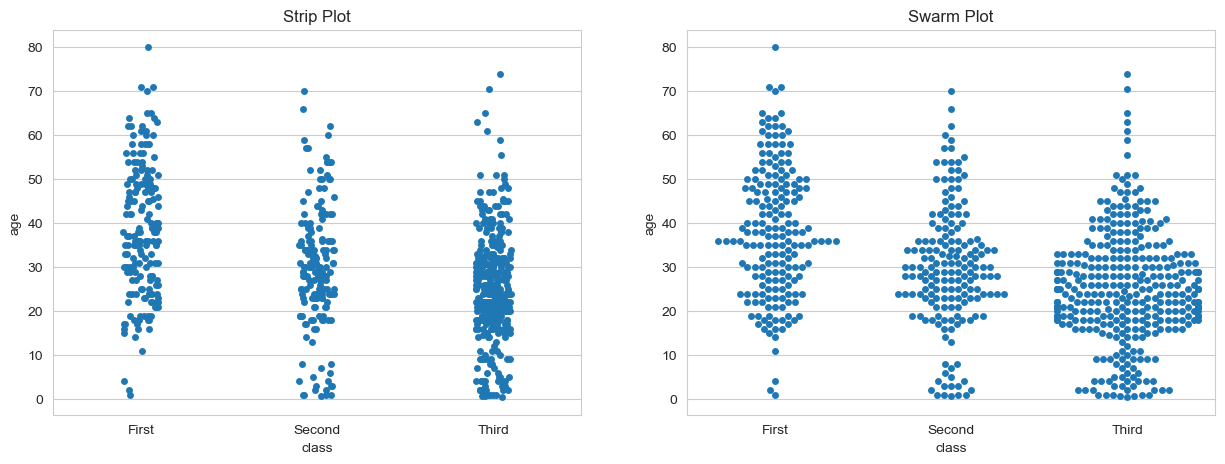

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax1
)
ax1.set_title('Strip Plot')
# ------------
sns.swarmplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax2
)
ax2.set_title('Swarm Plot')

plt.show() 

---
### 막대(확률) 그래프

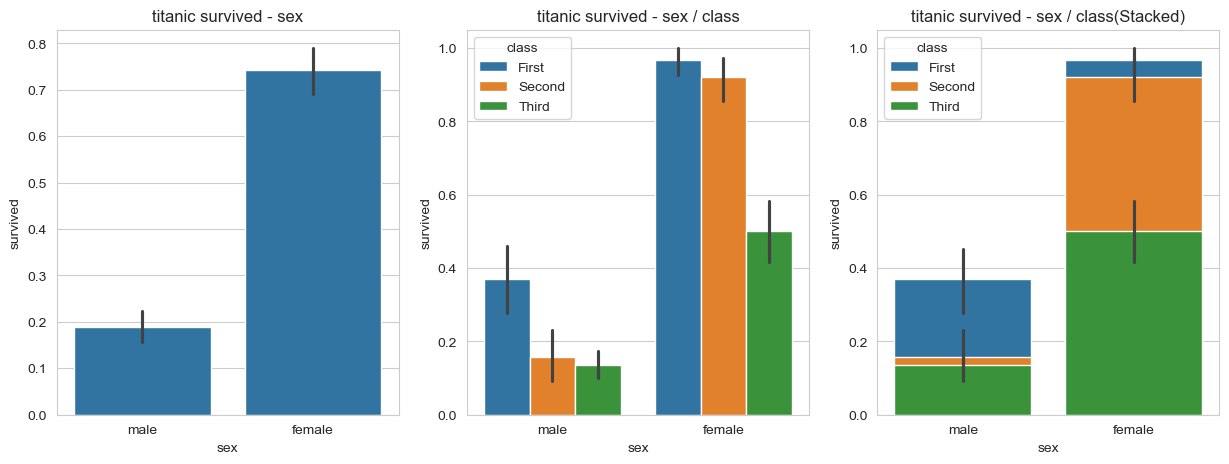

In [26]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1
)
ax1.set_title('titanic survived - sex')
# ----------------------------------------------------- 
sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    data=titanic,
    ax=ax2
)
ax2.set_title('titanic survived - sex / class')
# ----------------------------------------------------- 
sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    data=titanic,
    dodge=False,
    ax=ax3
)
ax3.set_title('titanic survived - sex / class(Stacked)')
# ----------------------------------------------------- 

plt.show()

---
### 빈도 그래프

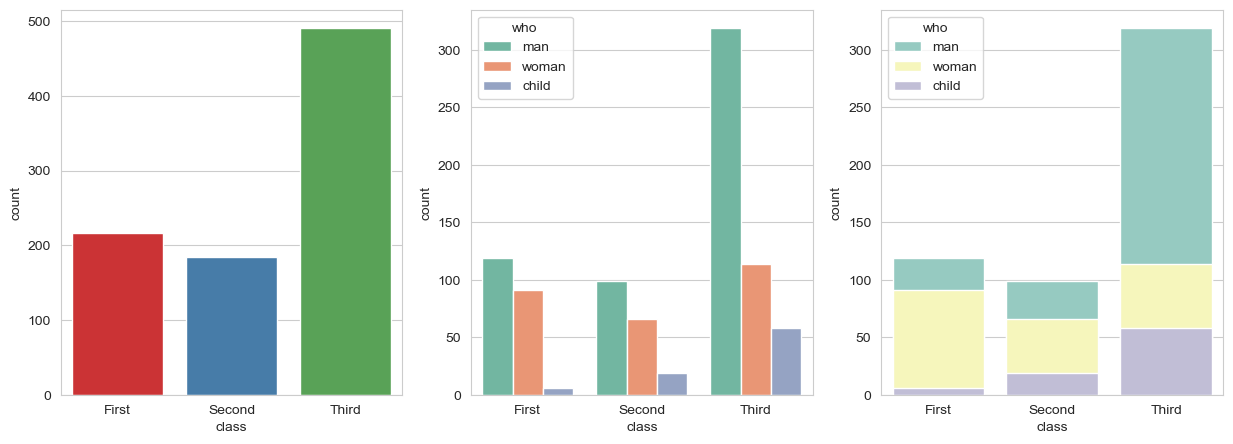

In [30]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.countplot(
    x='class',
    data=titanic,
    palette='Set1',
    ax=ax1
)
# -----------------------------------
sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set2',
    ax=ax2
)
# -----------------------------------
sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set3',
    dodge=False,
    ax=ax3
)
# -----------------------------------


plt.show()

---
### 박스플롯 / 바이올린 그래프 
: 박스플롯은 데이터의 분포와 주요 통계지표를 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다. 

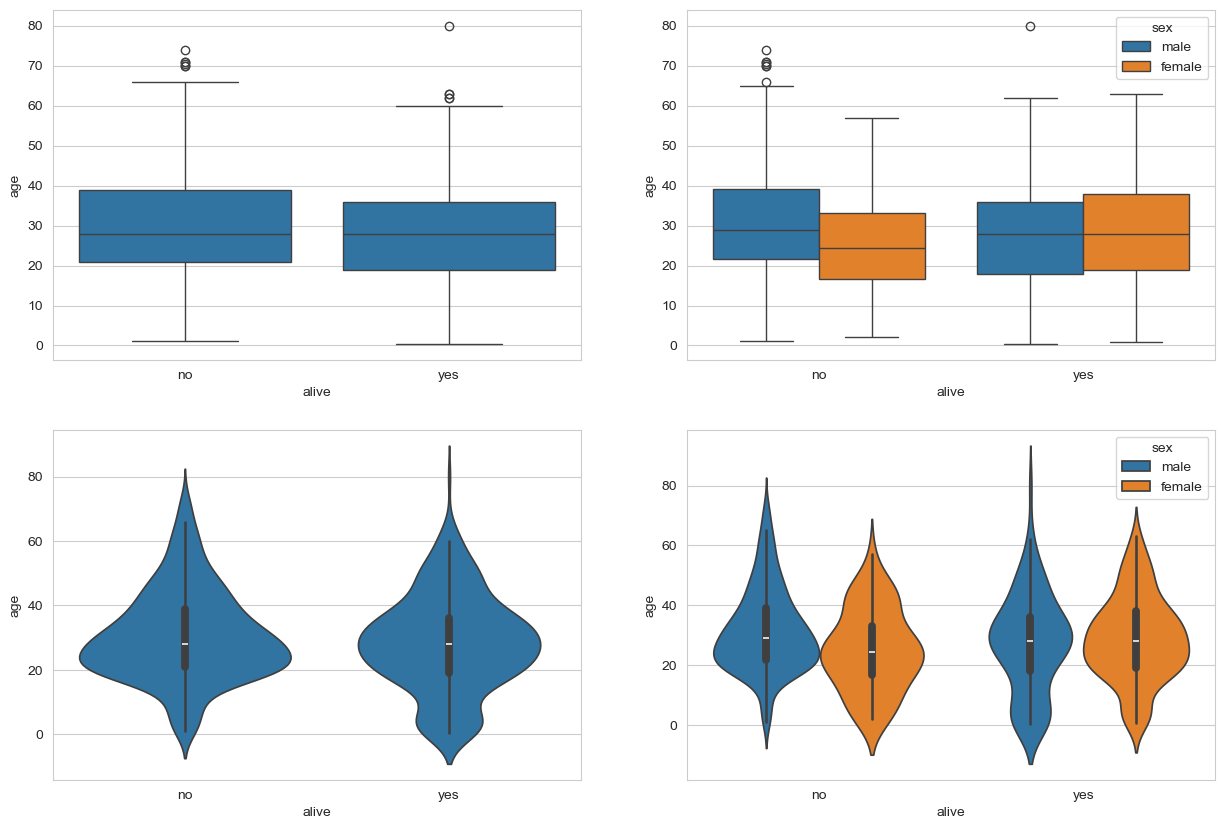

In [34]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 플롯
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1
)
# ----------------------------------
# 성별 추가 
sns.boxplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax2
)
# ----------------------------------
# 바이올린 그래프 
sns.violinplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax3
)
# ----------------------------------
# 성별 추가 
sns.violinplot(
    x='alive',
    y='age',
    hue = 'sex',
    data=titanic,
    ax=ax4
)


plt.show()

---
### 조인트 그래프
: 산점도를 기본으로 하고 각 축에 대한 히스토그램을 동시 제공

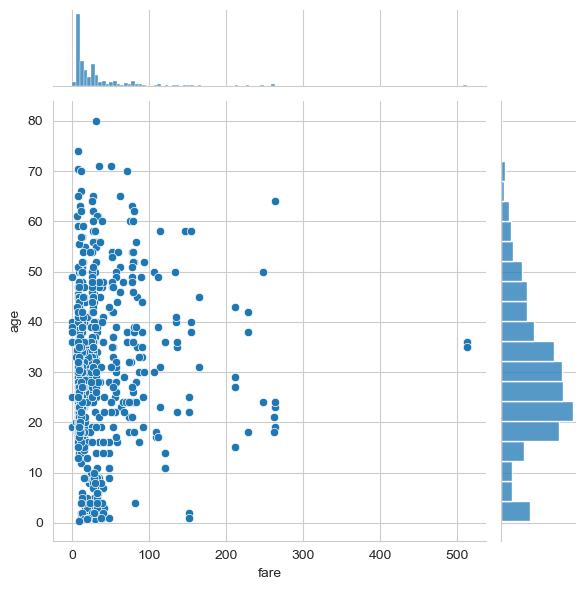

In [35]:
# 기본값
sns.jointplot(
    x='fare',
    y='age',
    data=titanic
)

plt.show()

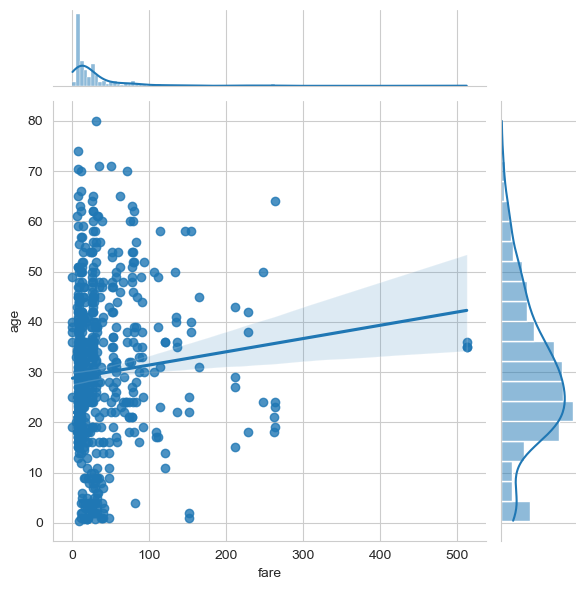

In [36]:
# 회귀선
sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic
)

plt.show()

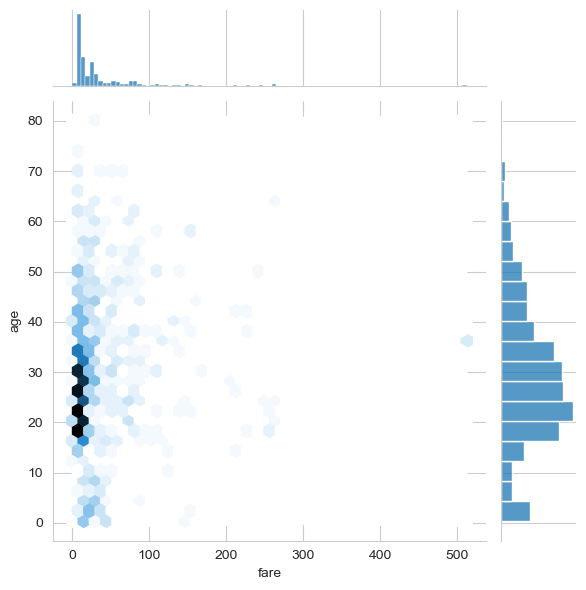

In [37]:
# 육각 그래프
sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic
)

plt.show()

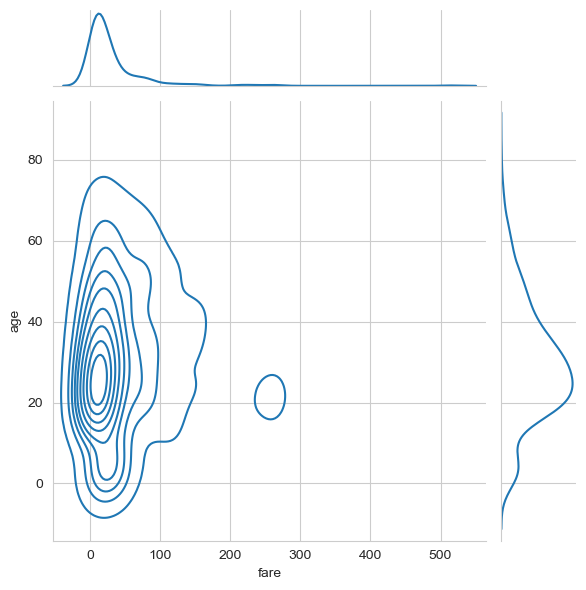

In [38]:
# 밀집 그래프
sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic
)

plt.show()